## Final Project Submission

Please fill out:
* Group Members: 
   <ul>
   <li>Esther Nyaikuba</li>
   <li>Mark Njagi</li>
   <li>Cleve Mwebi</li>
   <li>Arnold Mochama</li>
   </ul>
 <p>
* Student pace:  Part time 
* Scheduled project review date/time:  4/11/2023
* Instructor name: Faith Rotich
* Blog post URL:

## Business Understanding

### Project Overview 
In this project, we create a multi-variate linear regression model that statistically simulates the relationship between house prices in the United States in comparison with several other factors. The dataset used for the project is limited to housing information in King County, located in the Washington state of the United States of America and includes housing information collected from 2014 to 2015. By undertaking this research and analysis, we intend to generate a prediction algorithm to be used by real estate agencies to forecast house prices. This algorithm, as well as the insights generated from this study will be crucial for housing agents to provide property valuations to their clients and be able to stay ahead of their competitors by approximating the effects of certain variable changes, and thus improve their marketing strategies.

### Objectives
<ul>
<li>To develop a model to estimate the price of house based on it features e.g number of bedrooms, bathrooms, sqft, location etc. </li>
<li>To identify the neighborhoods with the highest sales prices.</li>
<li>To identify how seasonal trends affect sales.</li>

### Limitations of the Data
Admittedly, the dataset provided for analysis contains some limitations which we have adequately acknowledged and accounted for. Such limitations include:

* Missing/ Null values in the dataset Deficiency in data values, which has been addressed by sourcing for additional   information online as well as feature engineering.

Furthermore, in our analysis we assert that each of the five assumptions of multiple linear regression have been fulfilled. The assumptions are as listed below:
1. There exists a linear relationship between each predictor variable and response variable.
2. Non multi-collinearity - None of the predictor variables are highly correlated with each other
3. The observations are independent
4. Homoscedasticity: The residuals have constant variance at every point in the linear model.
5. Multivariate Normality: The residuals of the model are normally distributed.


## Data Understanding
In this section, we provide an in-depth examination of the King County House Sales dataset. This dataset is the cornerstone of our analysis. Understanding its structure and properties is critical for a successful data-driven exploration.

### Background Information
The real estate industry in the United States is one of the fastest growing industries in the country, accounting for at least 11% of the country's GDP per year (reference). Taking how important this industry is to the economy into consideration, it is important to find a solution to one of its major pillars: pricing. In the United States, real estate agencies struggle to find a balance between affordability of their products, marketing strategies and goals. In such a volatile market that is directly impacted by challenges as inflation and interest rates, it is important to establish some sort of control over controllable factors that may affect pricing levels.

### Data Overview
The King County House Sales dataset is the focus of our analysis. It contains housing-related data, and we intend to use this data to provide insights into the factors that influence house sale prices. Dataset name: King County House Sales Dataset Source: The dataset can be retrieved from the Center for Spatial Data Science, University of Chicago or Kaggle, or the link below; https://geodacenter.github.io/data-and-lab//KingCounty-HouseSales2015/ Time: The data was collected from May 2014 to May 2015.

### Data Structure
The dataset has the following structural features; 
1. Number of rows = 21,597 
2. Number of columns = 21 
3. The data format is CSV. 

### Column names and their descriptions
The following are the descriptions of the columns in the dataset.
<ul>
<li>"*id*" - Unique identifier for a house</li>
<li>"*date*" - The date the house was sold
<li>"*price*" - Sale price (prediction target)
<li>"*bedrooms*" - Number of bedrooms
<li>"*bathrooms*" - Number of bathrooms
<li>"*sqft_living*" - Square footage of living space in the home
<li>"*sqft_lot*" - Square footage of the lot
<li>"*floors*" - Number of floors (levels) in the house
<li>"*waterfront*" - Whether the house is on a waterfront
<li>"*view*" - Quality of view from house.
Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake/river/creek, and other
<li>"*condition*" - How good the overall condition of the house is. Related to the maintenance of the house.
<li>"*grade*" - Overall grade of the house. Related to the construction and design of the house.
<li>"*sqft_above*" - Square footage of house apart from the basement
<li>"*sqft_basement*" - Square footage of the basement
<li>"*yr_built*" - Year when the house was built
<li>"*yr_renovated*" - Year when the house was renovated
<li>"*zipcode*" - ZIP Code used by the United States Postal Service
<li>"*lat*" - Latitude coordinate
<li>"*long*" - Longitude coordinate
<li>"*sqft_living15*" - The square footage of interior housing living space for the nearest 15 neighbors
<li>"*sqft_lot15*" - The square footage of the land lots of the nearest 15 neighbors

### Data Types 
The dataset comprises the following data types: integers, floats, strings(objects), and dates. Understanding these data types is essential for variable management and analysis.
</ul>


### Missing values 
Our initial exploration demonstrated the presence of missing values in some columns. These columns are: 1. Waterfront – 2376 (11% of the data in the column) 2. View – 63(0.2917% of the data in the column) 3. Yr_renovated – 3842(17.7895% of the data in the column) 
### Secondary Data Sources. 
For additional context and reference, we sourced the following data source, https://github.com/nonlocal-lia/King-County-Housing-Analysis/blob/main/data/king_county_neighborhoods.csv The above data source shows the zip codes and their corresponding Neighborhood names. We used this to group the homes into neighborhoods.

### Steps
Our analysis followed the following steps: 
1. Data cleaning and Wrangling. 
2. Exploratory Data Analysis. (EDA) 
3. Linear Regression. 
4. Results. 
5. Conclusion. 
6. Recommendations.

# Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the CSV File

In [2]:
df = pd.read_csv('kc_house_data.csv')

# Data Exploration

In [3]:
#Check the first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#Check the last 5 rows
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
#Check for the Number of rows and columns.
df.shape

(21597, 21)

In [6]:
# Checking for the column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
#Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
#Checking the datatypes of the columns
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
# provides a summary of key statistical measures for each numeric column
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
#convert a column 'date' to a datetime data type
df['date']=pd.to_datetime (df['date'])

In [11]:
df['month'] = df['date'].dt.month
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1


# Data Wrangling and Cleaning

## Check for Null values

In [12]:
#Check for missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month               0
dtype: int64

From the above result we see that waterfront has 2376 missing values, view column has 63 missing values, while the year the houses were renovated has 3842 missing values.

In [13]:
#Dropping columns that will not be useful in regression
df = df.drop(['id','sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement', 'view', 'waterfront', 'sqft_lot','yr_renovated'], axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,yr_built,zipcode,lat,long,month
0,2014-10-13,221900.0,3,1.00,1180,1.0,Average,7 Average,1955,98178,47.5112,-122.257,10
1,2014-12-09,538000.0,3,2.25,2570,2.0,Average,7 Average,1951,98125,47.7210,-122.319,12
2,2015-02-25,180000.0,2,1.00,770,1.0,Average,6 Low Average,1933,98028,47.7379,-122.233,2
3,2014-12-09,604000.0,4,3.00,1960,1.0,Very Good,7 Average,1965,98136,47.5208,-122.393,12
4,2015-02-18,510000.0,3,2.00,1680,1.0,Average,8 Good,1987,98074,47.6168,-122.045,2


In [14]:
# Checking for existence of duplicate entries
df.duplicated().values.any()

False

No duplicated row in the dataset.

## Checking the percentage of Missing values

In [15]:
(df.isnull().mean())*100

date           0.0
price          0.0
bedrooms       0.0
bathrooms      0.0
sqft_living    0.0
floors         0.0
condition      0.0
grade          0.0
yr_built       0.0
zipcode        0.0
lat            0.0
long           0.0
month          0.0
dtype: float64

The "waterfront", "yr_renovated" columns have quite a significant amount of their data missing, 11% and 18% respectively. Though not significant but noticeble, is the portion of the "view" column data missing.

## Categorical Variables

Considering the fact that the 'waterfront' column predominantly features 'NO' with 19,075 entries, while 'YES' is notably less common with only 146 entries, it becomes apparent that the majority of homes in this dataset lack a waterfront view. 

Considering that the majority of properties in the dataset are categorized as 'NONE', indicating no specific view mentioned.

In [16]:
#checking for unique values in the condition column
df['condition'].unique()
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [17]:
#checking for unique values in the grade column
df['grade'].unique()
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

### Merging Data Sets and Feature Engineering

In [18]:
location = pd.read_csv(r"king_county_neighborhoods.csv")


new_areas = location.rename(columns={"Zipcode": "zipcode"})
new_areas

# Convert the 'zipcode' column to string data type in both DataFrames
new_areas['zipcode'] = new_areas['zipcode'].astype(str)
df['zipcode'] = df['zipcode'].astype(str)

# Merge on 'zipcode'
merged_data = pd.merge(df, new_areas, on='zipcode', how='left') 
merged_data.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,yr_built,zipcode,lat,long,month,Neighborhood
0,2014-10-13,221900.0,3,1.00,1180,1.0,Average,7 Average,1955,98178,47.5112,-122.257,10,SE Seattle
1,2014-12-09,538000.0,3,2.25,2570,2.0,Average,7 Average,1951,98125,47.7210,-122.319,12,N Seattle
2,2015-02-25,180000.0,2,1.00,770,1.0,Average,6 Low Average,1933,98028,47.7379,-122.233,2,Kenmore
3,2014-12-09,604000.0,4,3.00,1960,1.0,Very Good,7 Average,1965,98136,47.5208,-122.393,12,West Seattle
4,2015-02-18,510000.0,3,2.00,1680,1.0,Average,8 Good,1987,98074,47.6168,-122.045,2,Sammamish


In [19]:
grouped = merged_data.groupby('Neighborhood')['price'].mean().reset_index()
grouped.head()

,Neighborhood,price
0,Auburn,291647.819978
1,Ballard,580740.480647
2,Bellevue,898466.083156
3,Black Diamond,423665.990000
4,Bothell,490377.107692


In [20]:
grouped.sort_values(by = 'price' ,ascending = False, inplace = True)
grouped = grouped.head(15)

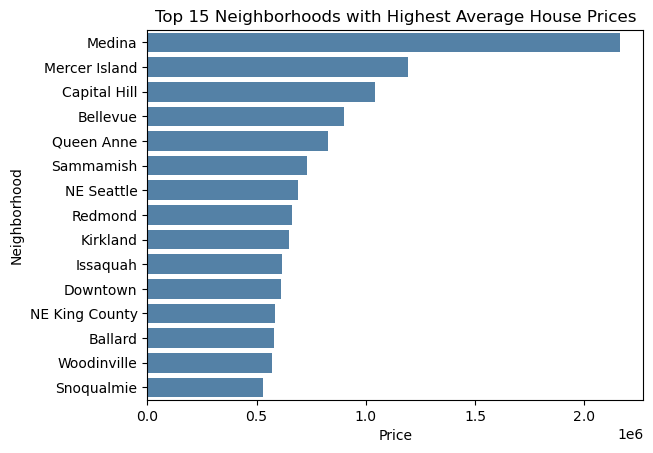

In [21]:
sns.barplot(y = grouped.Neighborhood, x = grouped.price, color = 'steelblue', orient = 'h', width = 0.8)
plt.title('Top 15 Neighborhoods with Highest Average House Prices', loc = 'center')
plt.xlabel('Price')
plt.ylabel('Neighborhood')
plt.show()

In [22]:
# Creating a function to map months to seasons
def get_season(date):
    if date.month in [3,4,5]:
        return 'Spring'
    elif date.month in [6,7,8]:
        return 'Summer'
    elif date.month in [9,10,11]:
        return 'Autumn'
    else:
        return 'Winter'
# Applying the function to the 'date' column to create a 'season' column
df['season'] = df['date'].apply(get_season)
df = df[df['date'] >= '2014-06-01']
df[['date', 'season']]

,date,season
0,2014-10-13,Autumn
1,2014-12-09,Winter
2,2015-02-25,Winter
3,2014-12-09,Winter
4,2015-02-18,Winter
...,...,...
21591,2015-02-19,Winter
21593,2015-02-23,Winter
21594,2014-06-23,Summer
21595,2015-01-16,Winter


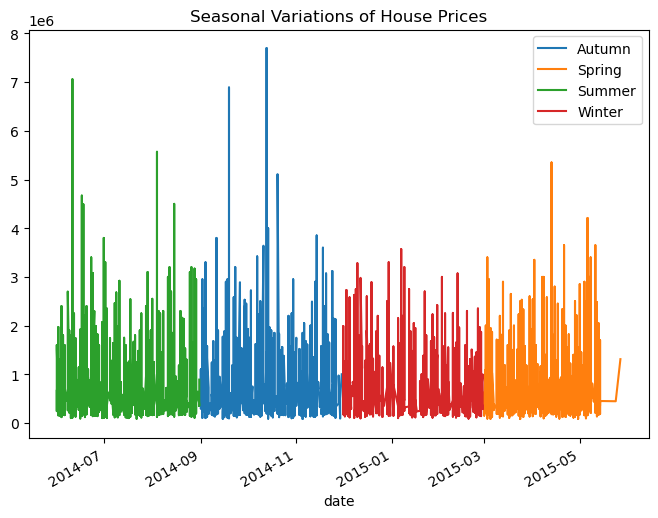

In [23]:
plt.figure(figsize=(8,6))
df.set_index('date').groupby('season')['price'].plot(legend=True);
plt.title('Seasonal Variations of House Prices');

In [24]:
df.groupby('season')['price'].agg([np.mean, np.median, np.std])

,mean,median,std
season,,,
Autumn,531276.474881,443725.0,378513.665722
Spring,554500.947789,464975.0,370885.947690
Summer,546719.464286,455000.0,368925.606702
Winter,519613.645467,430000.0,348171.543129


From the output above, it is evident that house prices are directly influenced by seasonal variations, which induces fluctuations based on the months. As illustrated in the graph above, housing prices are usually at their lowest in the early months of the year, which are generally considered winter months. The prices then increase in the oncoming months, with a peak in spring and summer. One possible reason to explain this peak during warm months could be that more people are usually on holiday during these periods and have more time to house-hunt compared to colder months, which leads valuers to price their properties highest during these months.


The information illustrated in the graph is well complimented by the statistics code block below. The mean price of houses is highest in spring and summer and lowest in winter months. Furthermore, the median value of house prices is summer is 465,000 USD which is considerably higher than 430,000 USD during winter months.

## Drop missing values

In [25]:
#Drop rows with missing values 
df = df.dropna()

In [26]:
# Verify that the missing values have been handled
df.isnull().sum()

date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
condition      0
grade          0
yr_built       0
zipcode        0
lat            0
long           0
month          0
season         0
dtype: int64

In [27]:
#Examining the data distributions in a bid to identify ategorical variables, continuous variables, as well as potential outliers.
df

,date,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,yr_built,zipcode,lat,long,month,season
0,2014-10-13,221900.0,3,1.00,1180,1.0,Average,7 Average,1955,98178,47.5112,-122.257,10,Autumn
1,2014-12-09,538000.0,3,2.25,2570,2.0,Average,7 Average,1951,98125,47.7210,-122.319,12,Winter
2,2015-02-25,180000.0,2,1.00,770,1.0,Average,6 Low Average,1933,98028,47.7379,-122.233,2,Winter
3,2014-12-09,604000.0,4,3.00,1960,1.0,Very Good,7 Average,1965,98136,47.5208,-122.393,12,Winter
4,2015-02-18,510000.0,3,2.00,1680,1.0,Average,8 Good,1987,98074,47.6168,-122.045,2,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2015-02-19,475000.0,3,2.50,1310,2.0,Average,8 Good,2008,98116,47.5773,-122.409,2,Winter
21593,2015-02-23,400000.0,4,2.50,2310,2.0,Average,8 Good,2014,98146,47.5107,-122.362,2,Winter
21594,2014-06-23,402101.0,2,0.75,1020,2.0,Average,7 Average,2009,98144,47.5944,-122.299,6,Summer
21595,2015-01-16,400000.0,3,2.50,1600,2.0,Average,8 Good,2004,98027,47.5345,-122.069,1,Winter


In [28]:
# aggregate function that contains the minimum and maximum values for each numeric column
df.agg(['min', 'max'])

,date,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,yr_built,zipcode,lat,long,month,season
min,2014-06-01,81000.0,1,0.5,370,1.0,Average,10 Very Good,1900,98001,47.1559,-122.519,1,Autumn
max,2015-05-27,7700000.0,33,8.0,12050,3.5,Very Good,9 Better,2015,98199,47.7776,-121.315,12,Winter


The comparison made above with regards to the min and max values was in a bid to identify potential outliers for each column. If the min value is less than the lower bound or the max value is greater than the upper bound, it suggests the presence of outliers in that particular column. We'll go ahead and make plots so as to get a better understanding of the concept expllained herein. 

# Exploratory Data Analysis

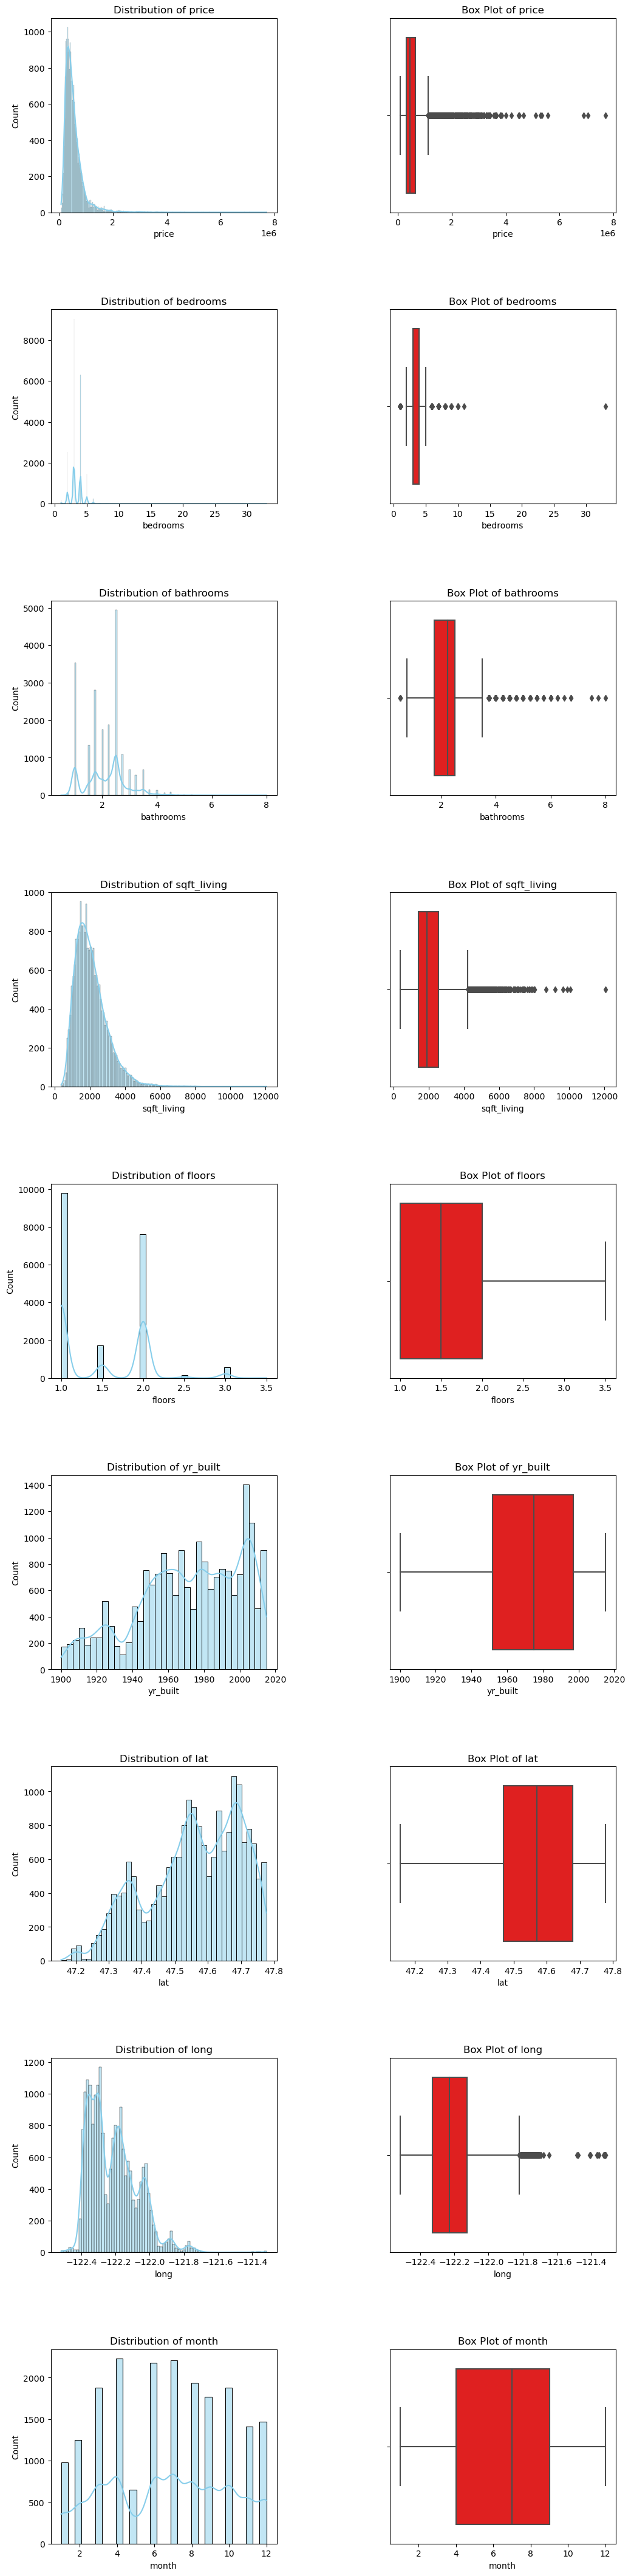

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Select only numerical columns for plotting
numerical_columns = df.select_dtypes(include=['number'])

# Set up subplots for distribution plots
fig, axes = plt.subplots(nrows=len(numerical_columns.columns), ncols=2, figsize=(12, 6 * len(numerical_columns.columns)))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Create distribution plots (histograms or KDE plots)
for i, column in enumerate(numerical_columns.columns):
    ax = axes[i, 0]
    
    sns.histplot(data=numerical_columns, x=column, kde=True, color='skyblue', ax=ax)
    
    ax.set_xlabel(column)
    ax.set_title(f'Distribution of {column}')

# Create box plots for presence of outliers
for i, column in enumerate(numerical_columns.columns):
    ax = axes[i, 1]
    
    sns.boxplot(data=numerical_columns, x=column, color='red', ax=ax)
    
    ax.set_xlabel(column)
    ax.set_title(f'Box Plot of {column}')
plt.show()

In [30]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'condition', 'grade', 'yr_built', 'zipcode', 'lat', 'long', 'month',
       'season'],
      dtype='object')

### Function to remove outliers

In [31]:
def remove_outliers(df, columns_to_check, outlier_threshold=1.5):

    for column in columns_to_check:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outlier detection
        lower_bound = Q1 - outlier_threshold * IQR
        upper_bound = Q3 + outlier_threshold * IQR

        # Remove outliers based on the bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return df

columns_to_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']
outlier_threshold = 1.5
remove_outliers(df, columns_to_check, outlier_threshold)

,date,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,yr_built,zipcode,lat,long,month,season
0,2014-10-13,221900.0,3,1.00,1180,1.0,Average,7 Average,1955,98178,47.5112,-122.257,10,Autumn
1,2014-12-09,538000.0,3,2.25,2570,2.0,Average,7 Average,1951,98125,47.7210,-122.319,12,Winter
2,2015-02-25,180000.0,2,1.00,770,1.0,Average,6 Low Average,1933,98028,47.7379,-122.233,2,Winter
3,2014-12-09,604000.0,4,3.00,1960,1.0,Very Good,7 Average,1965,98136,47.5208,-122.393,12,Winter
4,2015-02-18,510000.0,3,2.00,1680,1.0,Average,8 Good,1987,98074,47.6168,-122.045,2,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2015-02-19,475000.0,3,2.50,1310,2.0,Average,8 Good,2008,98116,47.5773,-122.409,2,Winter
21593,2015-02-23,400000.0,4,2.50,2310,2.0,Average,8 Good,2014,98146,47.5107,-122.362,2,Winter
21594,2014-06-23,402101.0,2,0.75,1020,2.0,Average,7 Average,2009,98144,47.5944,-122.299,6,Summer
21595,2015-01-16,400000.0,3,2.50,1600,2.0,Average,8 Good,2004,98027,47.5345,-122.069,1,Winter


In [32]:
df.shape

(19829, 14)

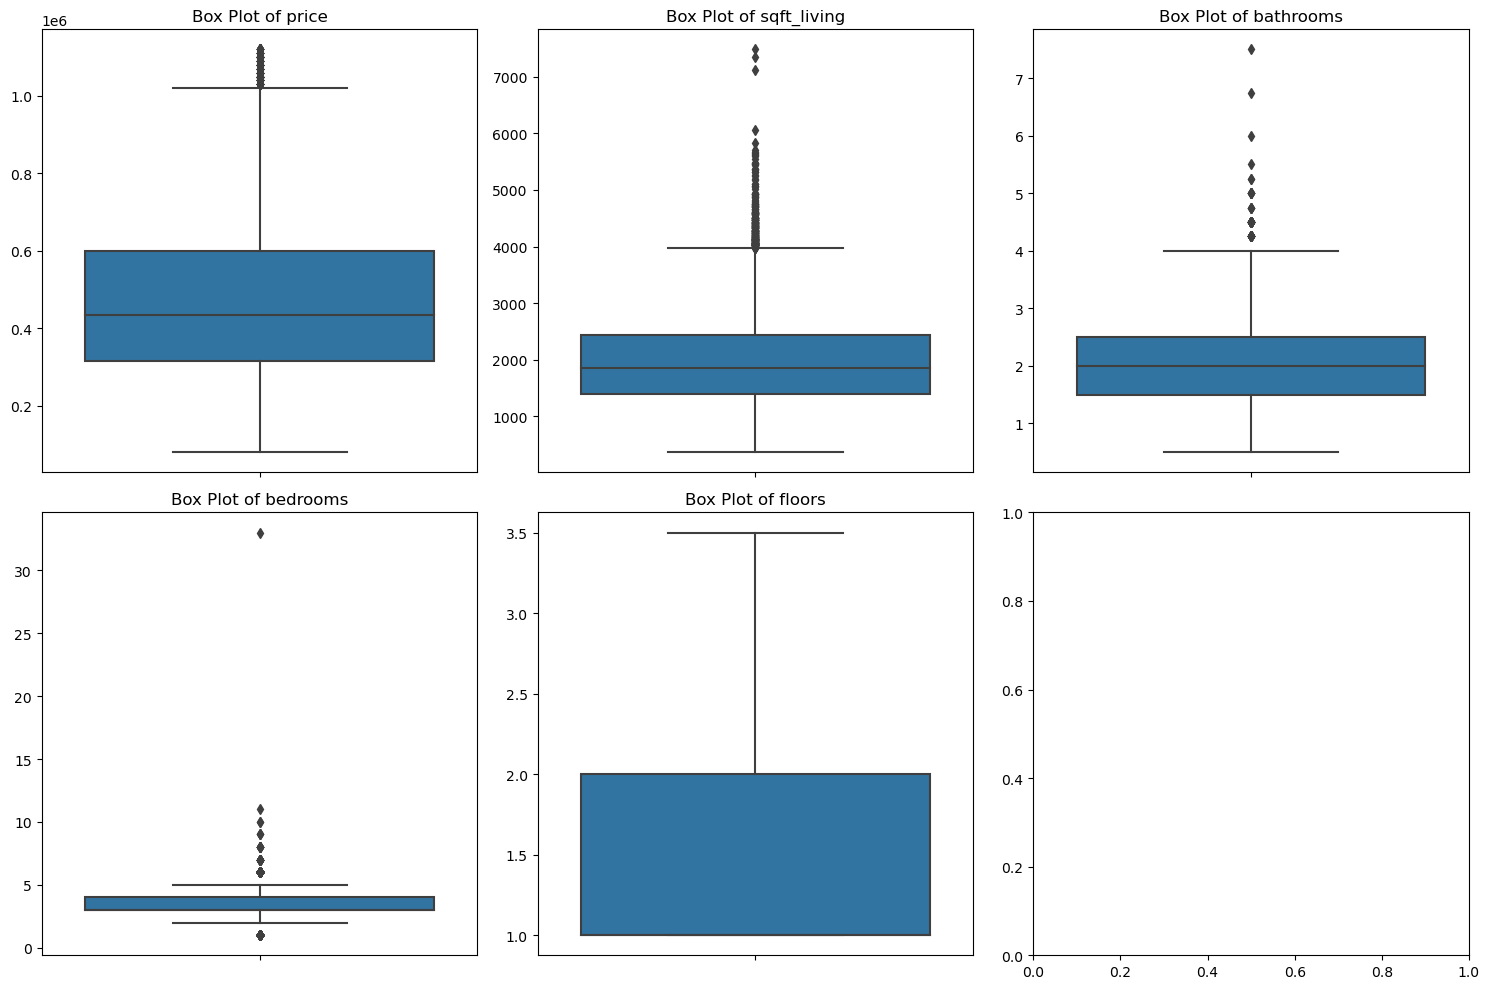

In [33]:
#Select the variables with potential outliers
df=remove_outliers(df, columns_to_check, outlier_threshold)
variables_of_interest = ['price', 'sqft_living', 'bathrooms', 'bedrooms', 'floors']

# Create subplots for box plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterate through the variables and create box plots
for i, var in enumerate(variables_of_interest):
    sns.boxplot(data=df, y=var, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Box Plot of {var}')
    axes[i // 3, i % 3].set_ylabel('')
    axes[i // 3, i % 3].set_xlabel('')

# Adjust subplot layout
plt.tight_layout()
plt.show()

## Distribution of the housing prices with outliers

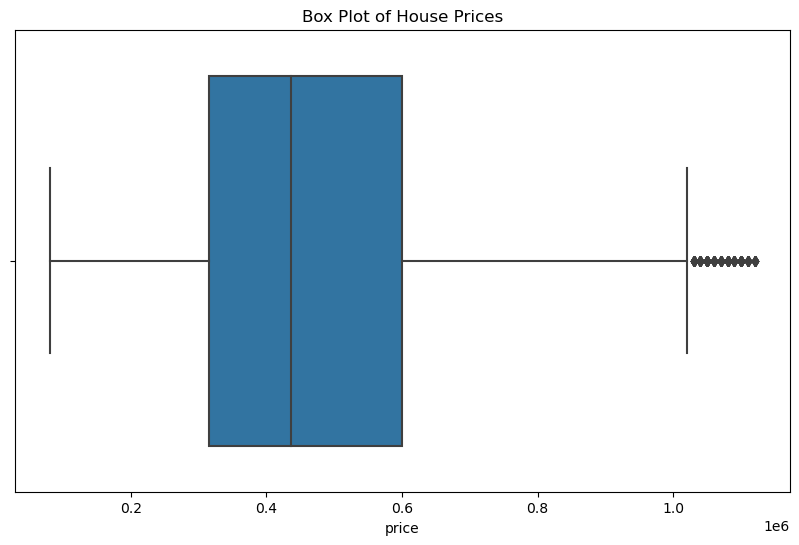

In [34]:
# Creating a box plot to identify outliers in the 'price' column
plt.figure(figsize=(10, 6))
sns.boxplot(x = df['price'])
plt.title('Box Plot of House Prices')
plt.show()

<Axes: xlabel='price', ylabel='Count'>

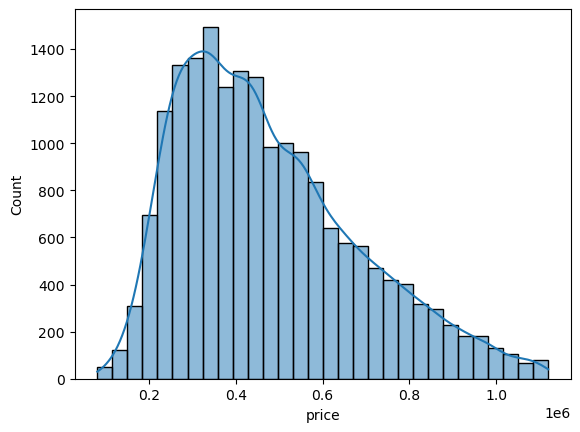

In [35]:
sns.histplot(df['price'], bins=30, kde=True)

## Distribution of housing prices without outliers

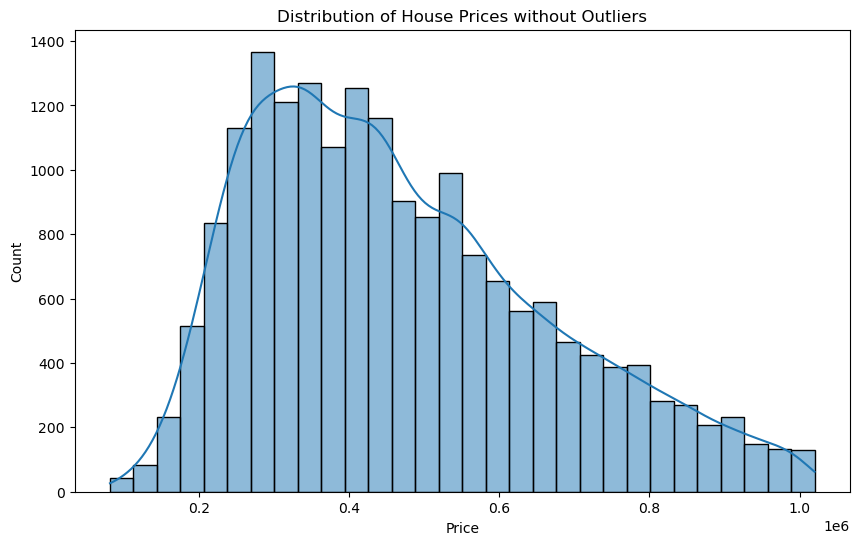

In [36]:
# Calculating the Interquartile Range (IQR) to identify outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper and lower bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the DataFrame to exclude outliers
hsedata_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Creating a histogram of house prices without outliers
plt.figure(figsize=(10, 6))
sns.histplot(hsedata_no_outliers['price'], bins=30, kde=True)
plt.title('Distribution of House Prices without Outliers')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12808\3123220703.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(feature).mean().plot.bar(
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12808\3123220703.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(feature).mean().plot.bar(
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12808\3123220703.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.group

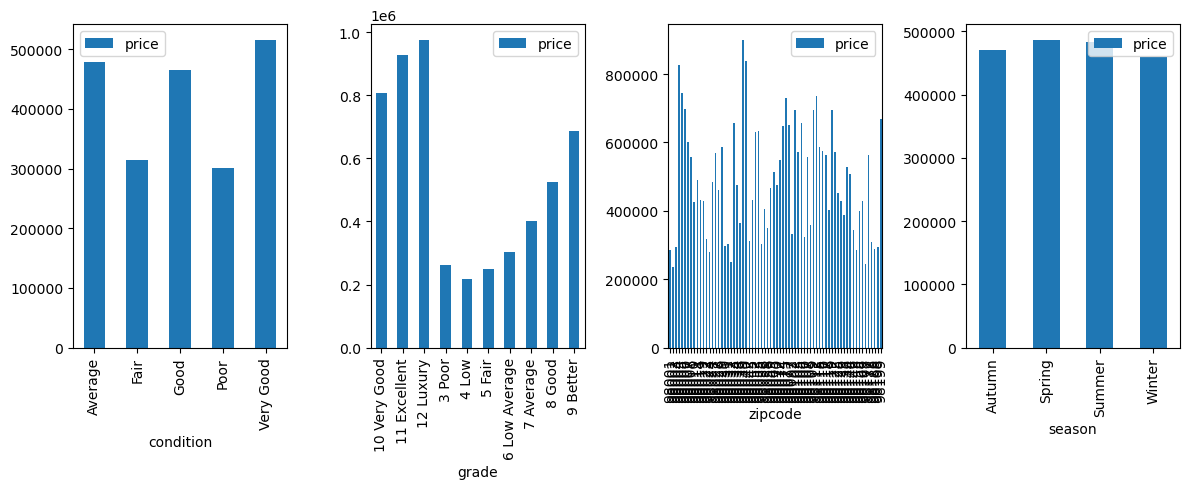

In [37]:
# Lets see the bar graphs of the categorical features

categorical_features = df.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))

for index, feature in enumerate(categorical_features):
    df.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])
plt.tight_layout()

# Correlation between price and the other columns

In [38]:
df.corr()['price']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12808\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


price          1.000000
bedrooms       0.293184
bathrooms      0.454244
sqft_living    0.619671
floors         0.274733
yr_built       0.064105
lat            0.433840
long           0.071486
month         -0.012690
Name: price, dtype: float64

## Heatmap

<Axes: >

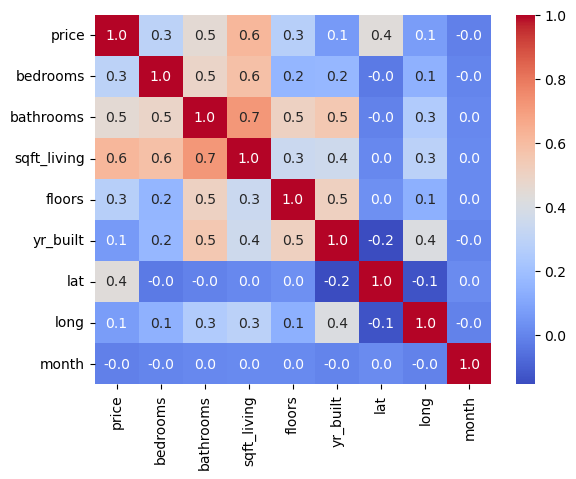

In [39]:
# Heatmap of the correlation matrix for numeric columns 
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".1f")

The scatter plot served to check for linearity between the variables 'sqft_living' (predictor variable) and 'price' (target variable). It is clear from the plot that there's a positive linear relation between between the two. As such these will serve to create our baseline linear regression model.

## Converting categorical values to numerical values

In [40]:
#Replacing categorical values with numerical values using the .map() method in a bid to make the dataset readily useable

condition_dict = {
    'Poor': 0,
    'Fair': 1,
    'Average': 2,
    'Good': 3,
    'Very Good': 4
}
df['condition'] = df['condition'].map(condition_dict)

grade_dict = {
    '3 Poor': 3,
    '4 Low': 4,
    '5 Fair': 5,
    '6 Low Average': 6,
    '7 Average': 7,
    '8 Good': 8,
    '9 Better': 9,
    '10 Very Good': 10,
    '11 Excellent': 11,
    '12 Luxury': 12,
    '13 Mansion': 13
}
df['grade'] = df['grade'].map(grade_dict)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12808\56272972.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition'] = df['condition'].map(condition_dict)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12808\56272972.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade'] = df['grade'].map(grade_dict)


The code above serves to convert the categorical datapoints of the variables/columns 'condition' and 'grade' to numeric datapoints by replacing them with integers allowing for easier manipluation and analysis.

In [41]:
df

,date,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,yr_built,zipcode,lat,long,month,season
0,2014-10-13,221900.0,3,1.00,1180,1.0,2,7,1955,98178,47.5112,-122.257,10,Autumn
1,2014-12-09,538000.0,3,2.25,2570,2.0,2,7,1951,98125,47.7210,-122.319,12,Winter
2,2015-02-25,180000.0,2,1.00,770,1.0,2,6,1933,98028,47.7379,-122.233,2,Winter
3,2014-12-09,604000.0,4,3.00,1960,1.0,4,7,1965,98136,47.5208,-122.393,12,Winter
4,2015-02-18,510000.0,3,2.00,1680,1.0,2,8,1987,98074,47.6168,-122.045,2,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2015-02-19,475000.0,3,2.50,1310,2.0,2,8,2008,98116,47.5773,-122.409,2,Winter
21593,2015-02-23,400000.0,4,2.50,2310,2.0,2,8,2014,98146,47.5107,-122.362,2,Winter
21594,2014-06-23,402101.0,2,0.75,1020,2.0,2,7,2009,98144,47.5944,-122.299,6,Summer
21595,2015-01-16,400000.0,3,2.50,1600,2.0,2,8,2004,98027,47.5345,-122.069,1,Winter


## Regression Modelling

In [42]:
model = sm.OLS(df['price'], sm.add_constant(df['sqft_living'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.170e+04
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:04:18   Log-Likelihood:            -2.5193e+05
No. Observations:               18773   AIC:                         5.039e+05
Df Residuals:                   18771   BIC:                         5.039e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.476e+05   3262.687     45.225      0.000    1.41e+05    1.54e+05
sqft_living   166.5396      1.540    108.171      0.000     163.522     169.557
==============================================================================
Omnibus:                      860.750   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              982.278
Skew:                           0.550   Prob(JB):                    5.02e-214
Kurtosis:                       3.210   Cond. No.                     5.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The output above shows the summary statistics of our baseline model. 

R-squared (R²):
The R-squared value is 0.384, which means that approximately 38.4% of the variation in the price can be explained by the variation in sqft_living.

F-statistic:
The F-statistic is 9520, and it is associated with a p-value of 0.00, which means the model is statistically significant.

Coefficients:
* The intercept (const) is approximately 147,600.
* The coefficient for sqft_living is approximately 166.54.

The intercept represents the estimated price of a house when the size of the living area (sqft_living) is zero. However, in a practical real estate context, having a living area size of zero is not meaningful, as every house will have some living area. Therefore, the intercept may not have a direct real-world interpretation in this context.

In a more meaningful way, it can be interpreted that the intercept here is the base price of a house of $147,600, when all other factors are not considered in the model (such as the number of bedrooms, number of bathrooms, etc.). It provides an estimate of the price of $145,000 when all other variables are at their reference values or when we haven't included those variables in the model.
These coefficients indicate the expected change in the price for a one-unit change in the corresponding independent variable.

For the coefficient for sqft_living, it suggests that, on average, for each additional square foot in the living area, the price of the house is expected to increase by approximately $166.54.

P-values of the coefficients (P>|t|):
Both the intercept and the sqft_living coefficient have very low p-values (0.000), indicating that they are statistically significant.
This means that both the intercept and sqft_living have a significant impact on the price.


## Checking the Assumptions of the Linear Regression

## 1. Linearity

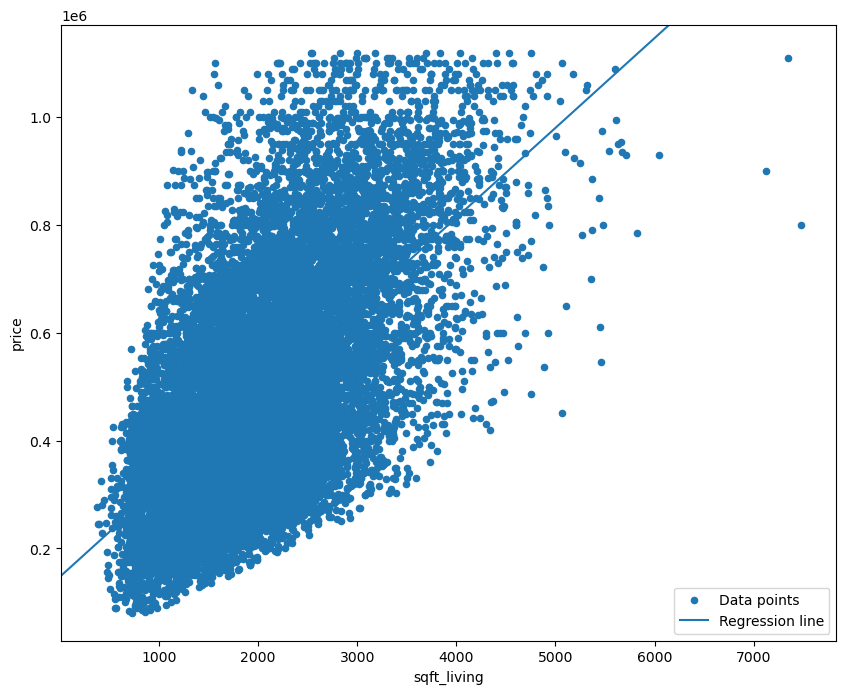

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=model, label="Regression line", ax=ax)
ax.legend();

From the scatter plot above, we can observe a positive linear relationship between 'price' and 'sqft_living'. This suggests that as the square footage of a house increases, the price of the house also tends to increase.

### 2. Homoscedasticity

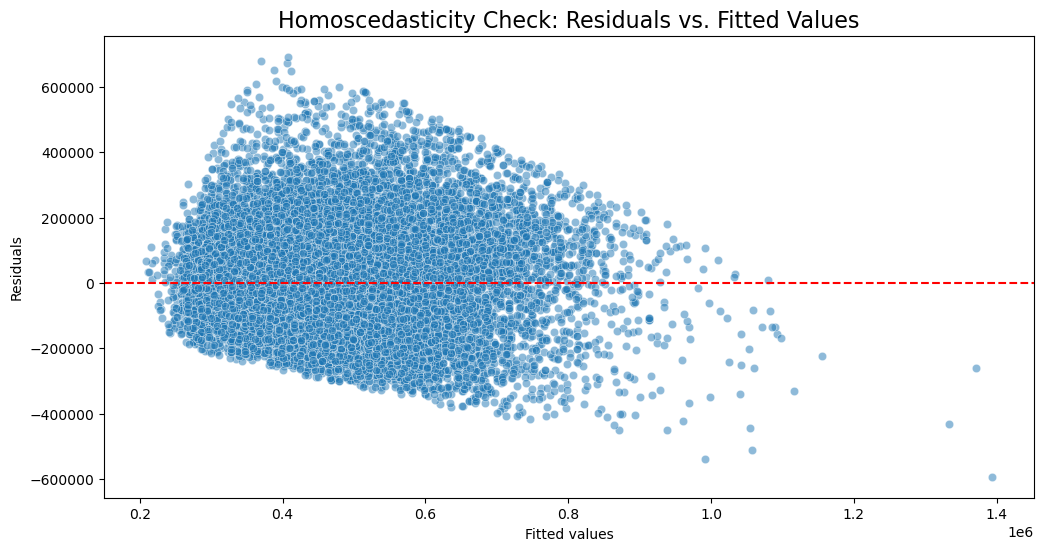

In [44]:
def homoscedasticity_check(model):
    # Get residuals and predicted values from the model
    model_residuals = model.resid
    model_fitted_y = model.fittedvalues
    
    # Create a scatterplot of residuals vs. predicted values
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.scatterplot(x=model_fitted_y, y=model_residuals, alpha=0.5, ax=ax)
    
    # Add a horizontal line at y=0
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Homoscedasticity Check: Residuals vs. Fitted Values', fontsize=16)
    plt.show()
    
homoscedasticity_check(model)

The variability of residuals does not remain constant across the entire range, resulting in a homoscedastic pattern meaning that the requirement for our linear regression is met. 

### 3. Independence of error

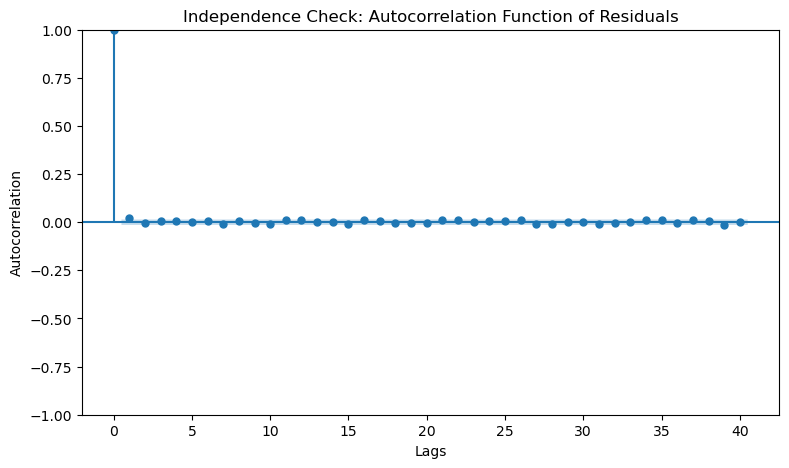

In [45]:
# plotting autocorrelation function of residuals
def independence_check(residuals):
    fig, ax = plt.subplots(figsize=(9,5))
    _ = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax)
    ax.set_xlabel('Lags')
    ax.set_ylabel('Autocorrelation')
    ax.set_title('Independence Check: Autocorrelation Function of Residuals')
    plt.show()
independence_check(model.resid)

The occurrence of a single peak beyond the confidence intervals indicates the existence of significant autocorrelation in the residuals, implying that the model is not fully accounting for all relevant information.

In [46]:
from statsmodels.stats.stattools import durbin_watson

dw_statistic = durbin_watson(model.resid)
print("Durbin-Watson Statistic:", dw_statistic)

Durbin-Watson Statistic: 1.9607220060939863


Our Durbin-Watson Statistic of 1.96 is within the acceptable range of 1.5 - 2.5 thus satisfying the assumption of independece of errors. 

### 4. Normal Distribution of Residuals 

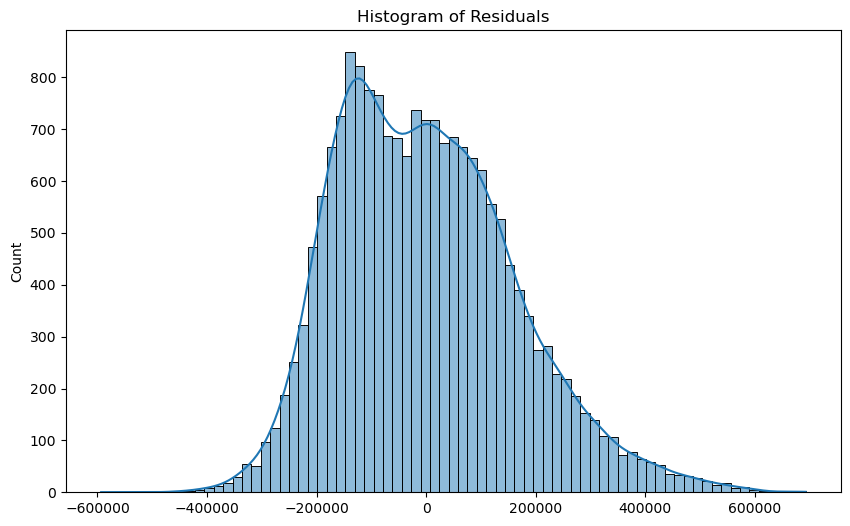

In [47]:
# Plotting histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(model.resid, kde=True)
plt.title('Histogram of Residuals')
plt.show()

The histogram does not show a perfect bell-shaped curve, suggesting that the residuals are not perfectly normally distributed. However, it is close enough to a normal distribution for the purpose of our analysis.

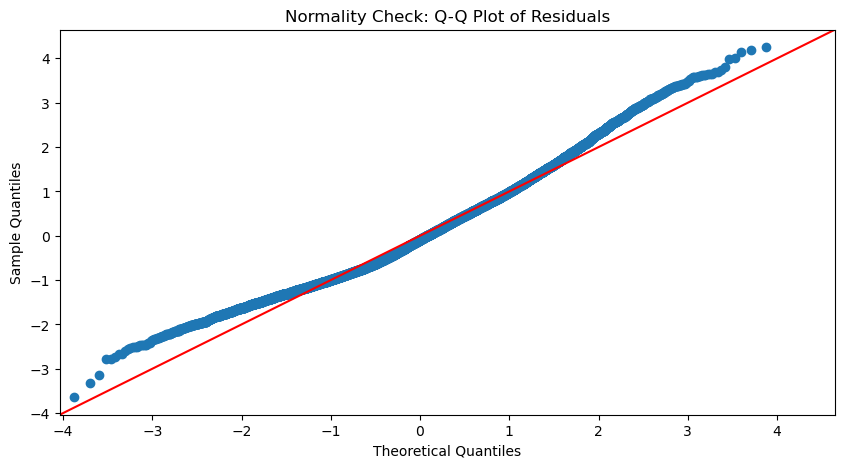

In [48]:
def normality_check(residuals):
    fig, ax2 = plt.subplots(figsize=(10, 5))
    sm.qqplot(residuals, fit=True, line='45', ax=ax2)
    ax2.set_xlabel('Theoretical Quantiles') 
    ax2.set_ylabel('Sample Quantiles')
    ax2.set_title('Normality Check: Q-Q Plot of Residuals')

    plt.show()
    
normality_check(model.resid)


The points on our Q-Q plot above closely follow the diagonal line (the "s" line), suggesting that the residuals approximately follow a normal distribution

In [49]:
import statsmodels.formula.api as smf

multiple_formula = 'price ~ sqft_living + bedrooms + bathrooms + condition'
multiple_model = smf.ols(formula=multiple_formula, data=df).fit()
multiple_model_summary = multiple_model.summary()
print(multiple_model_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     3131.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:04:22   Log-Likelihood:            -2.5168e+05
No. Observations:               18773   AIC:                         5.034e+05
Df Residuals:                   18768   BIC:                         5.034e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.113e+05   6572.749     16.941      

## Results and Findings

Our R-squared of 0.400 which means that about 40% of the variance in the house prices can be explained by the predictor variables. This was an improvement over the simple linear regression which had an R-squared of 0.384. 

The P-value of our F-statistic is 0.00 which is below our chosen significance value of 0.05 meaning that our model is statistically significant. 

Assuming each of the predictor variables is zero then we expect the price to be $111,300

Sqft_living: For this particular predictor variable its coefficient of 176.22 suggests that, holding all variables constant for each additional square foot of living space the price increases by approximately 178.34 units.

Bedrooms: Furthermore, the model shows an inverse linear relationship with number of bedrooms. Holding all variables constant, an increase in the number of bedrooms by one unit will lead to a reduction of price by $26,770

Bathrooms: Also, from the model and holding all variables constant an increase of one unit in the number of bathrooms (+1) is associated with an increase of approximately $15,990 in the price of the house.

Condition: Holding all variables constant for each unit increase in the condition rating (for example, from Good to Very Good) of a given house the price increases by  $30,560

The p-values of each of the predictor values are below the significance level of 0.05 which means that changes in the predictor variables are associated with a statitically significant change in the target variable.



## Conclusion

1. To summarise, approximately 40.0% of the observed fluctuations in housing prices may be explained by our predictive model. Property values are heavily influenced by key factors such square footage, bathrooms, bedrooms, and housing condition. But it's important to recognize that a lot of dynamic factors affect real estate, which makes predicting house values with 100% accuracy quite difficult. As a reliable tool for the Real Estate Agency and its clients to estimate house prices, our model attempts to explain and provide aid with property values within King County. Nonetheless, in order to make more precise price judgments, it is advised to supplement the model with extra data.

2. Key Factors Affecting House Prices:
The coefficients of the independent variables in the model provide insights into their impact on house prices in the northwestern county.

price = (sqft_living * 176.2193) - (bedrooms * 26,770) + (bathrooms * 15,990) + (condtion * 30560) + 111,300

Positive Factors: Variables such as the number of bathrooms, square footage of living space (sqft_living), and house condition have positive coefficients. An indication that an increase in these factors is associated with higher house prices.

Negative Factors: The number of bedrooms (bedrooms) has a negative coefficient implying that an increase in the number of bedrooms with all other factors held constant may lead to lower house prices.

Customer satisfaction, knowing the above features have an influen ce on the buyers decision, the stakeholder can advice on what renovations are most marketable and what properties will have the highest appreciation.

## Recommendations

1. The size of the living space, as represented by the 'Sqft_living' variable, is a significant driver of house prices. If possible, consider focusing on properties with more substantial living spaces, as they tend to command higher prices.

2. While an increase in the number of bedrooms is associated with a reduction in price in your model. However, this should be investigated further. It might be specific to the dataset or region you're working with.

3. The condition of a house significantly impacts its price. If you're looking to sell or invest in properties, it's worthwhile to maintain or improve their condition to increase their market value.

4. From our analysis it was found that the number of bathrooms positively correlates with the house prices we recommend that our stakeholder puts more investment/consideration of this factor be it in the buying, selling or even renovation of houses. 

5. Our analysis proves that location is also a huge factor that affects appreciation or depreciation of house prices. Real estate agents should therefore consider the neighborhood when advising their clients on the property to invest in. In particular, the agents should look out for the safety of the neighborhoods, proximity to key amenities such as hospitals and schools, as well as the affluency of a location when determining the price levels. 

## Next Steps

Conducting additional analysis to pinpoint the factors that are influencing the model's predictions would be beneficial to explore the inclusion of new variables that could enhance the model's accuracy, for example crime data by zip code, school rating data as well as data regarding other social amenities. 
